In [29]:
import matplotlib.pyplot as plt
import json

In [30]:
with open('data/true_deepseek.json') as file:
    true_deepseek = json.load(file)
with open('data/fake_deepseek.json') as file:
    fake_deepseek = json.load(file)

In [31]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_deepseek:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_deepseek:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

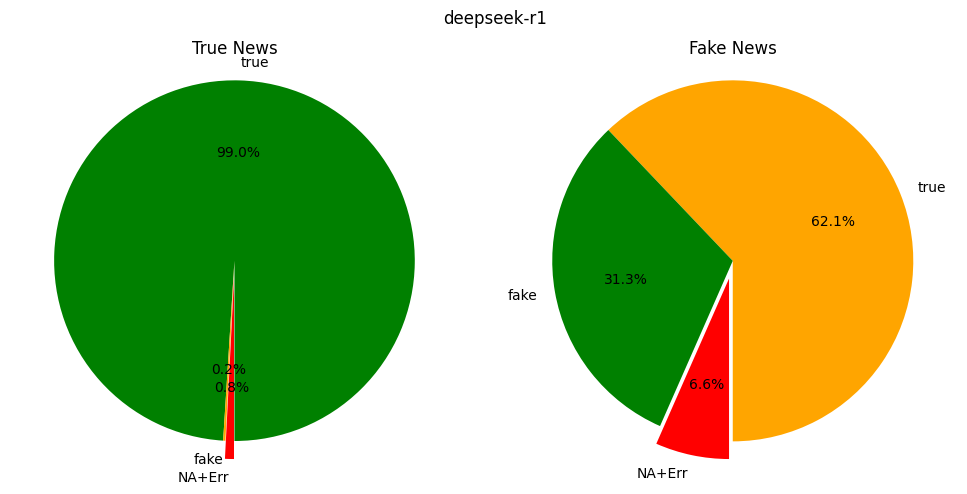

In [32]:
label = ['true', 'fake', 'NA+Err']
slice_colors_true = ['green', 'orange', 'red']
slice_colors_fake = ['orange', 'green', 'red']
explode = [0.0, 0.0, 0.1]
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('deepseek-r1')
plt.show()

In [33]:
precision = ff/(ff+tf+tn+te)
recall = ff/(ff+ft+fn+fe)
print(f"Accuracy: {(tt+ff)/2000} TPR: {ff/1000} TNR: {tt/1000} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Accuracy: 0.6515 TPR: 0.313 TNR: 0.99 Precision: 0.9690402476780186 Recall: 0.313 F-score: 0.473167044595616


In [34]:
with open('data/true_llama.json') as file:
    true_llama = json.load(file)
with open('data/fake_llama.json') as file:
    fake_llama = json.load(file)

In [35]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_llama:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_llama:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

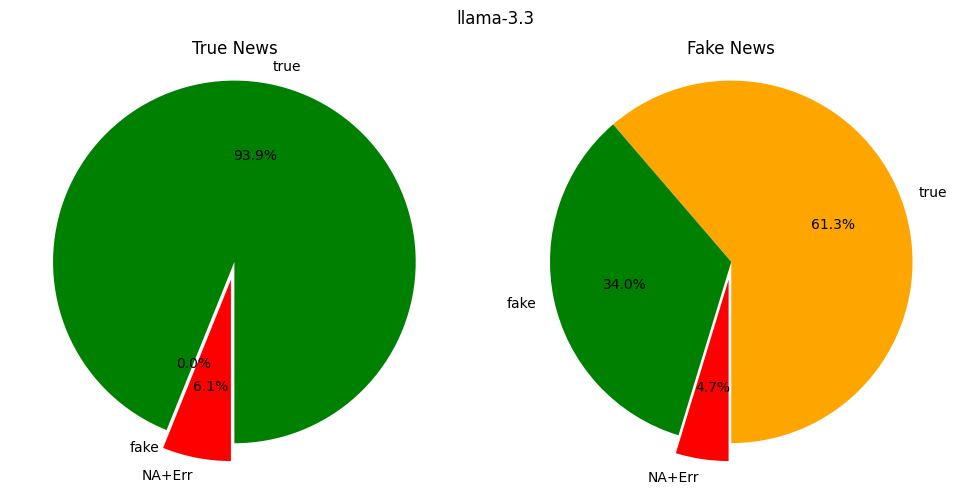

In [36]:
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('llama-3.3')
plt.show()

In [37]:
precision = ff/(ff+tf+tn+te)
recall = ff/(ff+ft+fn+fe)
print(f"Accuracy: {(tt+ff)/2000} TPR: {ff/1000} TNR: {tt/1000} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Accuracy: 0.6395 TPR: 0.34 TNR: 0.939 Precision: 0.8478802992518704 Recall: 0.34 F-score: 0.4853675945753033
